# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 652


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" 
api_keys = weather_api_key
appid = api_keys
settings = {"units": "metric", "appid": api_keys}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_keys}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | umm kaddadah
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | ostrovnoy
Processing Record 10 of Set 1 | prince george
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | fairbanks
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | morgan city
Processing Record 16 of Set 1 | kerteh
City not found. Skipping...
Processing Record 17 of Set 1 | fulton
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | rocha
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | mar del plata
Processing R

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,4.24,99,16,1.56,NZ,1680195680
1,umm kaddadah,13.6017,26.6876,28.32,9,23,5.84,SD,1680195680
2,saint george,37.1041,-113.5841,9.41,62,40,4.63,US,1680195603
3,port lincoln,-34.7333,135.8667,13.99,77,100,1.40,AU,1680195609
4,new norfolk,-42.7826,147.0587,12.73,79,91,1.88,AU,1680195681


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,4.24,99,16,1.56,NZ,1680195680
1,umm kaddadah,13.6017,26.6876,28.32,9,23,5.84,SD,1680195680
2,saint george,37.1041,-113.5841,9.41,62,40,4.63,US,1680195603
3,port lincoln,-34.7333,135.8667,13.99,77,100,1.40,AU,1680195609
4,new norfolk,-42.7826,147.0587,12.73,79,91,1.88,AU,1680195681


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

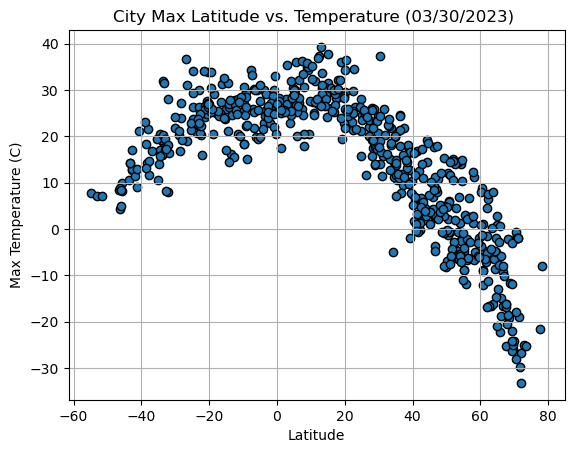

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s) " % time.strftime("%m/%d/%Y"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

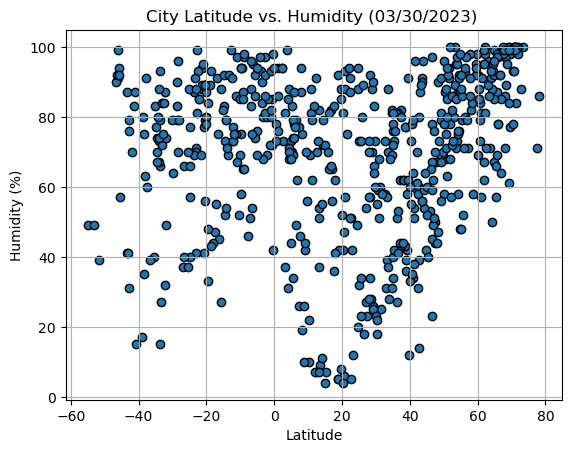

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s) " % time.strftime("%m/%d/%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

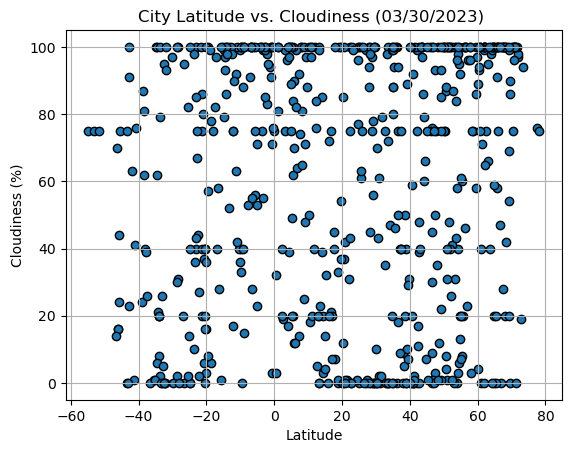

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s) " % time.strftime("%m/%d/%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

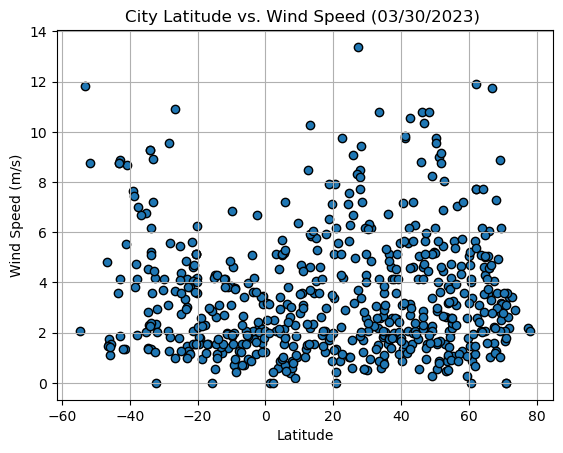

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s) " % time.strftime("%m/%d/%Y"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the scatterplot 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,umm kaddadah,13.6017,26.6876,28.32,9,23,5.84,SD,1680195680
2,saint george,37.1041,-113.5841,9.41,62,40,4.63,US,1680195603
5,jamestown,42.0970,-79.2353,-0.20,59,0,2.06,US,1680195559
7,ostrovnoy,68.0531,39.5131,-2.09,86,100,7.28,RU,1680195682
8,prince george,53.9166,-122.7530,1.25,73,0,1.03,CA,1680195683


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,4.24,99,16,1.56,NZ,1680195680
3,port lincoln,-34.7333,135.8667,13.99,77,100,1.40,AU,1680195609
4,new norfolk,-42.7826,147.0587,12.73,79,91,1.88,AU,1680195681
6,busselton,-33.6500,115.3333,18.87,66,79,6.15,AU,1680195682
9,atuona,-9.8000,-139.0333,26.92,75,33,6.84,PF,1680195683


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8008320213140016


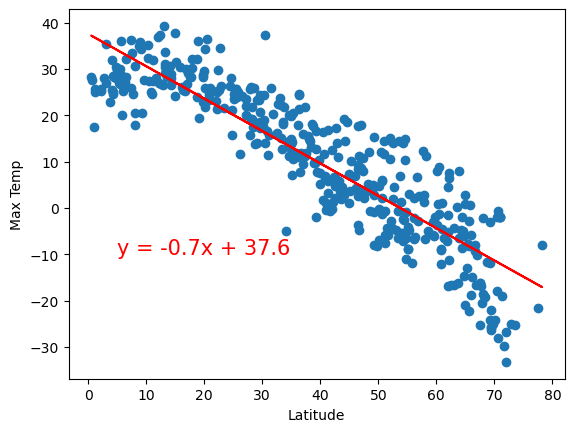

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(5,-10))

The r-value is: 0.43633133077597747


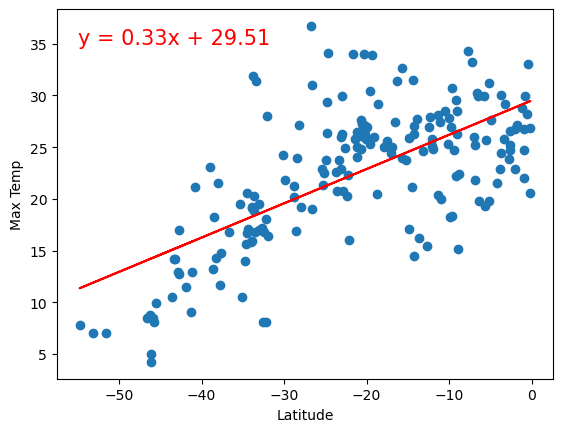

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,35))

**Discussion about the linear relationship:** In the northern hemisphere, we observe that the closer we are to the equator (Latitude = 0) the greater the maximum temperature. The southern hemisphere has the same outcome. R-values are 0.80 and 0.44, respectively.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17728644301571161


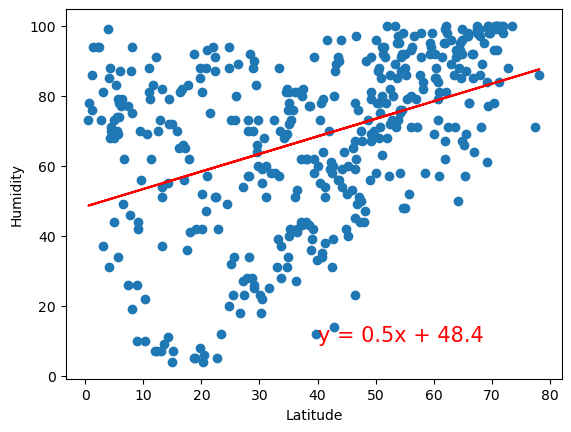

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.07057955922572529


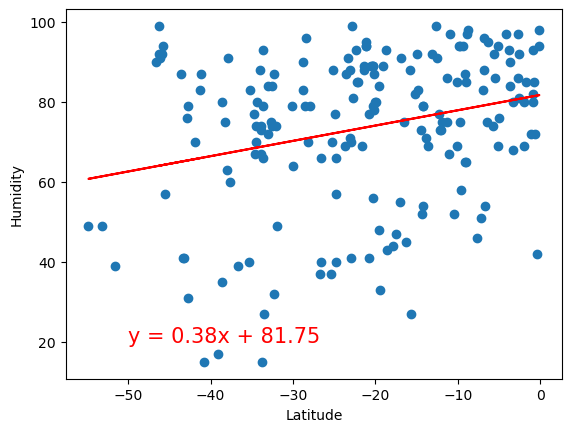

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,20))

**Discussion about the linear relationship:** In the northern hemisphere, we can infer that humidity increases slightly as latitude increase to the north most point. On the contrary, in the southern hemisphere, it appears that humidity increases marginally as we get closer to the equator. Low R-values, at 0.18 and 0.07 respectively, indicates that there not a strong relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0215022267128907


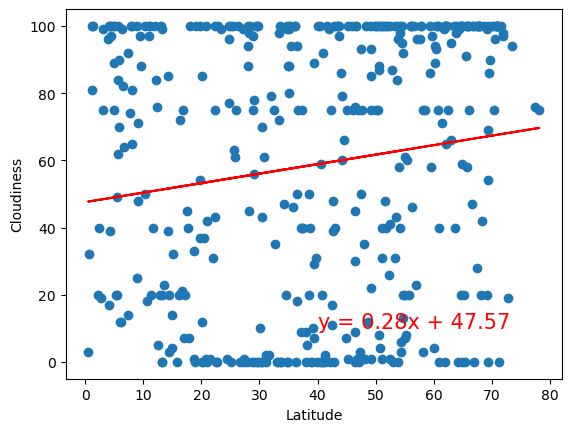

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))

The r-value is: 0.13732256748854643


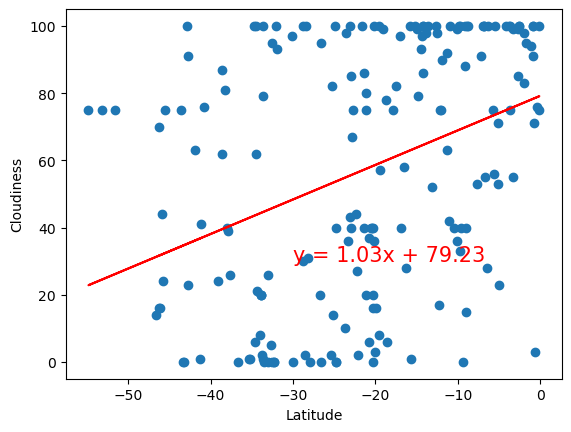

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-30,30))

**Discussion about the linear relationship:** In the northern hemisphere, we observe that there is minimal correlation bewteen latitude and cloudiness, with an approximate 10% increase across the plot latitude. The southern hemisphere appears to have a higher relationship of cloudiness vs latitude. Again, low R-values, at 0.02 and 0.14 respectively, indicates that there is not a strong relationship between latitude and humidity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0034028578631470053


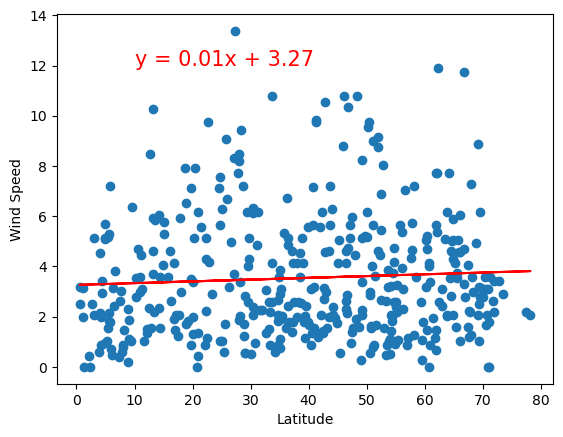

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,12))

The r-value is: 0.062239040700515696


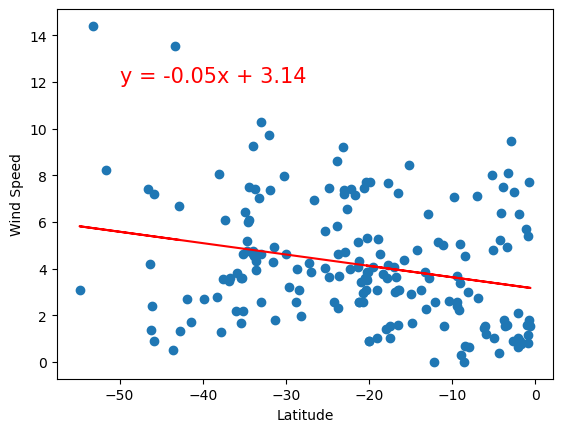

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-50,12)

**Discussion about the linear relationship:** In the northern hemisphere, there appears to be no significant relationship occurring between wind speed and latitude The southern hemisphere statistics show marginal relationship between latitude and wind speed, with wind speed reducing slightly moving further away from the equator. Again, low R-values, at 0.003 and 0.06 respectively, indicates that there is not a strong relationship between latitude and wind speed.